In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_data(path):
    folder_path = os.path.join(os.path.dirname(os.path.abspath('')), 'data_analysis', path)
    cols = ["saved_h", "saved_in"]
    data_list = []

    for folder_name in os.listdir(folder_path):
        if os.path.isdir(os.path.join(folder_path, folder_name)):
            results_file_path = os.path.join(folder_path, folder_name, "results.csv")
            if os.path.isfile(results_file_path):
                data = pd.read_csv(results_file_path)
                data["sum_of_columns"] = data[cols].sum(axis=1)  # Sum the values in "saved_h" and "saved_in" for each row
                data_list.append(data)

    # Flatten the data_list and combine all the summed values into one list
    combined_data_2 = [value for df in data_list for value in df["sum_of_columns"]]
    return combined_data_2

combined_data_2 = get_data('human_data')


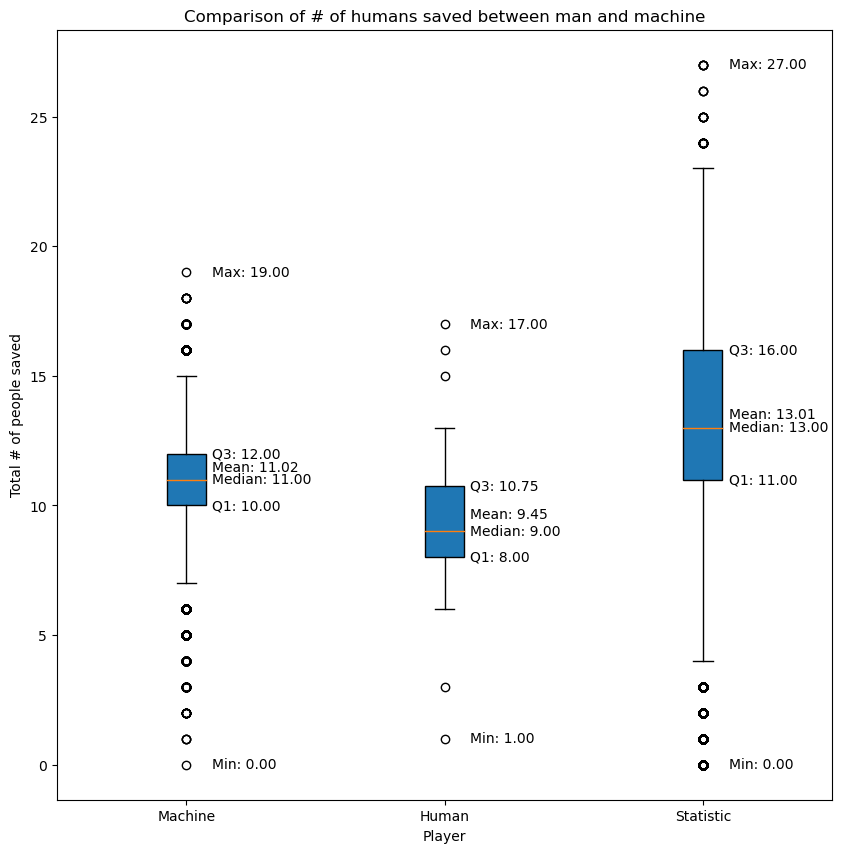

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

combined_data = get_data('machine_data')
stat_data = get_data('stat_data')

# Calculate statistical measures for the Machine box plot
machine_median_value = np.median(combined_data)
machine_mean_value = np.mean(combined_data)
machine_q1 = np.percentile(combined_data, 25)
machine_q3 = np.percentile(combined_data, 75)
machine_lower_outliers = [value for value in combined_data if value < machine_q1 - 1.5 * (machine_q3 - machine_q1)]
machine_upper_outliers = [value for value in combined_data if value > machine_q3 + 1.5 * (machine_q3 - machine_q1)]

# Create data for the Human box plot (replace with actual data if available)
# For this example, I am using random data for the Human box plot
human_combined_data = combined_data_2

# ... (the previous code for getting combined_data and human_combined_data) ...

# Assume stat_data is a list containing numerical values (similar to combined_data and human_combined_data)
# Calculate statistical measures for the Stat box plot
stat_median_value = np.median(stat_data)
stat_mean_value = np.mean(stat_data)
stat_q1 = np.percentile(stat_data, 25)
stat_q3 = np.percentile(stat_data, 75)
stat_lower_outliers = [value for value in stat_data if value < stat_q1 - 1.5 * (stat_q3 - stat_q1)]
stat_upper_outliers = [value for value in stat_data if value > stat_q3 + 1.5 * (stat_q3 - stat_q1)]

# Creating the boxplot
plt.figure(figsize=(10, 10))

# Plot the Machine box plot
machine_box = plt.boxplot([combined_data], positions=[1], labels=["Machine"], patch_artist=True)
plt.text(1.1, machine_mean_value + 0.44, f"Mean: {machine_mean_value:.2f}", ha='left', va='center')
plt.text(1.1, machine_median_value, f"Median: {machine_median_value:.2f}", ha='left', va='center')
plt.text(1.1, machine_q1, f"Q1: {machine_q1:.2f}", ha='left', va='center')
plt.text(1.1, machine_q3, f"Q3: {machine_q3:.2f}", ha='left', va='center')
plt.text(1.1, max(combined_data), f"Max: {max(combined_data):.2f}", ha='left', va='center')
plt.text(1.1, min(combined_data), f"Min: {min(combined_data):.2f}", ha='left', va='center')

# Plot the Human box plot
human_box = plt.boxplot([human_combined_data], positions=[2], labels=["Human"], patch_artist=True)
plt.text(2.1, human_mean_value + 0.2, f"Mean: {human_mean_value:.2f}", ha='left', va='center')
plt.text(2.1, human_median_value, f"Median: {human_median_value:.2f}", ha='left', va='center')
plt.text(2.1, human_q1, f"Q1: {human_q1:.2f}", ha='left', va='center')
plt.text(2.1, human_q3, f"Q3: {human_q3:.2f}", ha='left', va='center')
plt.text(2.1, max(human_combined_data), f"Max: {max(human_combined_data):.2f}", ha='left', va='center')
plt.text(2.1, min(human_combined_data), f"Min: {min(human_combined_data):.2f}", ha='left', va='center')

# Plot the Stat box plot
stat_box = plt.boxplot([stat_data], positions=[3], labels=["Statistic"], patch_artist=True)
plt.text(3.1, stat_mean_value + 0.5, f"Mean: {stat_mean_value:.2f}", ha='left', va='center')
plt.text(3.1, stat_median_value, f"Median: {stat_median_value:.2f}", ha='left', va='center')
plt.text(3.1, stat_q1, f"Q1: {stat_q1:.2f}", ha='left', va='center')
plt.text(3.1, stat_q3, f"Q3: {stat_q3:.2f}", ha='left', va='center')
plt.text(3.1, max(stat_data), f"Max: {max(stat_data):.2f}", ha='left', va='center')
plt.text(3.1, min(stat_data), f"Min: {min(stat_data):.2f}", ha='left', va='center')

plt.title("Comparison of # of humans saved between man and machine")
plt.xlabel("Player")
plt.ylabel("Total # of people saved")
plt.show()

